## Making figure A4

Start by importing modules, data and priors.

In [12]:
import arviz as az
import matplotlib.pylab as plt
import numpyro.distributions as dist
import h5py

from makeCorner import *

In [15]:
data_mass_variation = h5py.File("../data/mass_variation_analysis.hdf", "r")

In [14]:
new_priors = {
    "logR20":dist.Uniform(-2,1),
    "alpha_ref":dist.Normal(-2,3),
    "mu_m1":dist.Uniform(20,50),
    "mMin":dist.Uniform(5,15),
    "bq":dist.Normal(0,3),
    "alpha_z":dist.Normal(0,4),
    "high_alpha_z": dist.Normal(0,4),
    "log_width_alpha_z": dist.Uniform(-1,3),
    "middle_m_alpha_z": dist.Uniform(20,75),
    "beta_z":dist.Uniform(0,10),
    "high_beta_z": dist.Uniform(0,10),
    "log_width_beta_z": dist.Uniform(-1,3),
    "middle_m_beta_z": dist.Uniform(20,75),
    "low_zp": dist.Uniform(0.2,4),
    "high_zp": dist.Uniform(0.2,4),
    "log_width_zp": dist.Uniform(-1,3),
    "middle_m_zp": dist.Uniform(20,75),
    "sig_m1": dist.Uniform(1.5, 15),
    "delta_zp":[-3.8, 4, 0.1],
}

### Making the figure

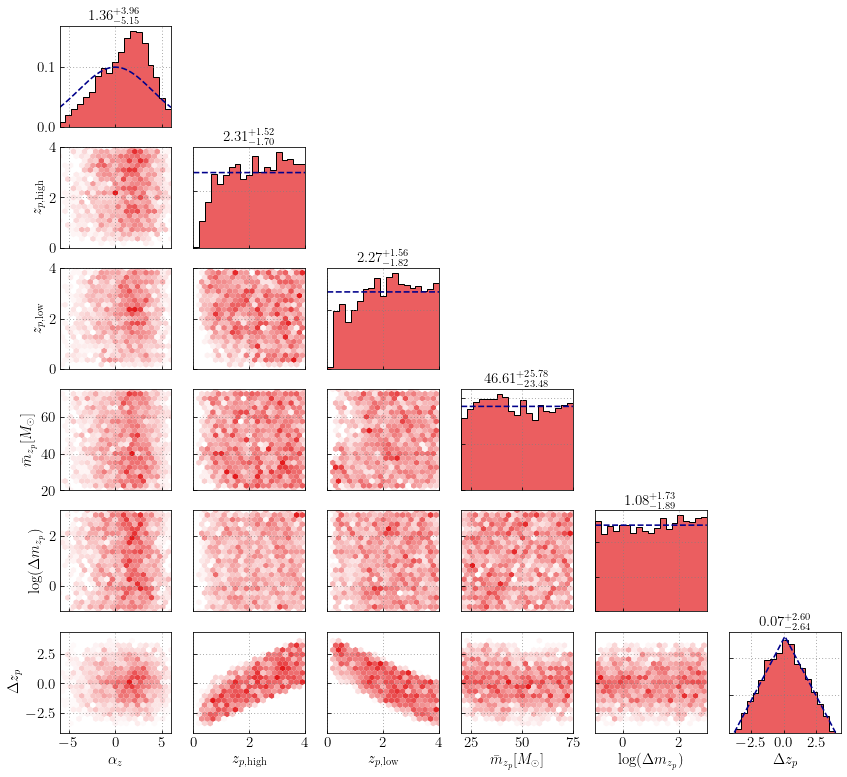

In [17]:
fig = plt.figure(figsize=(14,13))
delta_zp = data_mass_variation['posterior/high_zp'][:] - data_mass_variation['posterior/low_zp'][:]

toPlot_no_GWB = {
    "alpha_z":{"data":data_mass_variation['posterior/alpha_z'],"plot_bounds":(-6,6),"label":r"$\alpha_z$"},
    "high_zp":{"data":data_mass_variation['posterior/high_zp'],"plot_bounds":(0,4),"label":r"$z_{p, \mathrm{high}}$"},
    "low_zp":{"data":data_mass_variation['posterior/low_zp'],"plot_bounds":(0,4),"label":r"$z_{p, \mathrm{low}}$"},
    "middle_m_zp":{"data":data_mass_variation['posterior/middle_m_zp'],"plot_bounds":(20,75),"label":r"$\bar m_{z_p} [M_\odot]$"},
    "log_width_zp":{"data":np.log10(data_mass_variation['posterior/width_zp']),"plot_bounds":(-1,3),"label":r"log($\Delta m_{z_p}$)"},
    "delta_zp":{"data":delta_zp, "plot_bounds":(-4.2,4.4), "label":r"$\Delta z_p$"},
}

plot_corner(fig,toPlot_no_GWB,'#e31a1c',labelsize=15, priors = new_priors)
plt.savefig("figure_A4.pdf", dpi=500, bbox_inches='tight')
plt.show()